In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [3]:
dataset_path = "/content/drive/MyDrive/data/5Animals"

idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

data_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size = (224,224)
)

data_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
      target_size = (224,224)

)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


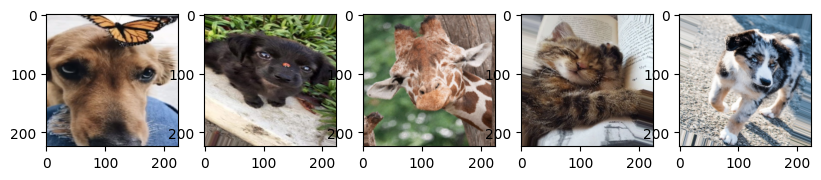

In [5]:
some_images=next(data_train)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(5):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [4]:
model = tf.keras.applications.vgg16.VGG16(
                                        weights="imagenet",
                                        input_shape=(224,224,3),
                                        include_top=False,
                                       )

In [10]:
my_model = tf.keras.models.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(5,activation='softmax'),
])

In [11]:
my_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [14]:
plt_model = my_model.fit(data_train, validation_data=data_validation, epochs=10)

Epoch 1/10
33/33 [==============================] - 39s 1s/step - loss: 0.0552 - accuracy: 0.9789 - val_loss: 0.4226 - val_accuracy: 0.8794
Epoch 2/10
33/33 [==============================] - 34s 1s/step - loss: 0.0410 - accuracy: 0.9856 - val_loss: 0.5923 - val_accuracy: 0.8677
Epoch 3/10
33/33 [==============================] - 38s 1s/step - loss: 0.0926 - accuracy: 0.9635 - val_loss: 0.6928 - val_accuracy: 0.7821
Epoch 4/10
33/33 [==============================] - 33s 999ms/step - loss: 0.0827 - accuracy: 0.9712 - val_loss: 0.3960 - val_accuracy: 0.8911
Epoch 5/10
33/33 [==============================] - 35s 1s/step - loss: 0.0500 - accuracy: 0.9779 - val_loss: 0.4655 - val_accuracy: 0.8872
Epoch 6/10
33/33 [==============================] - 33s 1s/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.5533 - val_accuracy: 0.8482
Epoch 7/10
33/33 [==============================] - 34s 1s/step - loss: 0.0332 - accuracy: 0.9914 - val_loss: 0.6428 - val_accuracy: 0.8872
Epoch 8/10
33/33 

In [15]:
my_model.save("5_Animals_v2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


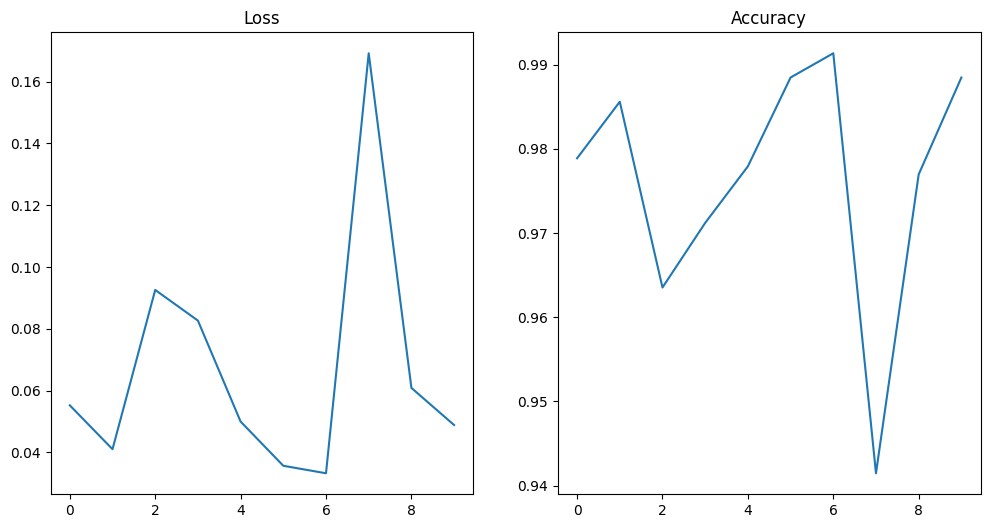

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(plt_model.history['loss'])
ax1.set_title("Loss")
ax2.plot(plt_model.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()